# Support Vector Jupyter Notebook
This is a jupyter notebook where i tested code and created some of the visualizations for the presentation. Feel free to check it out, but it is not the most well put together file out there. Beware of a lot of redundant and repetitive code.


In [ ]:
from scipy.io import loadmat

MAT_PATH = "emails.mat" 
SEED = 1000002

def load_spam_mat(path=MAT_PATH):
    data = loadmat(path)
    print(data.keys())
    
    X = data["X"]
    Y = data["Y"]
    print(X)
    print(Y)
    return X, Y
    
    
X, y = load_spam_mat()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Y'])
<COOrdinate sparse matrix of dtype 'float64'
	with 2351499 stored elements and shape (57173, 10000)>
  Coords	Values
  (957, 0)	1.0
  (2164, 0)	1.0
  (2603, 0)	1.0
  (2925, 0)	1.0
  (2939, 0)	1.0
  (3010, 0)	3.0
  (3021, 0)	3.0
  (3330, 0)	1.0
  (3577, 0)	1.0
  (4148, 0)	1.0
  (4506, 0)	1.0
  (5193, 0)	1.0
  (6595, 0)	3.0
  (6799, 0)	1.0
  (6897, 0)	1.0
  (7237, 0)	2.0
  (7304, 0)	1.0
  (7567, 0)	1.0
  (9590, 0)	3.0
  (11570, 0)	1.0
  (11702, 0)	2.0
  (11826, 0)	1.0
  (11965, 0)	3.0
  (12246, 0)	4.0
  (12442, 0)	1.0
  :	:
  (49154, 9999)	2.0
  (49216, 9999)	1.0
  (49476, 9999)	1.0
  (49515, 9999)	5.0
  (49832, 9999)	1.0
  (50228, 9999)	2.0
  (50575, 9999)	2.0
  (50752, 9999)	2.0
  (50803, 9999)	4.0
  (51154, 9999)	2.0
  (51332, 9999)	2.0
  (51580, 9999)	1.0
  (51854, 9999)	2.0
  (52354, 9999)	2.0
  (52431, 9999)	1.0
  (52725, 9999)	1.0
  (52836, 9999)	4.0
  (52948, 9999)	2.0
  (53318, 9999)	1.0
  (54075, 9999)	8.0
  (541

In [14]:
from scipy import sparse

Xcsr = X.tocsr()   # now you can slice rows
print(Xcsr[666].toarray())  # full first email as dense vector

X_test = Xcsr[0]
print("Indices:", X_test.indices)
print("Counts:", X_test.data)
print(Xcsr[0])

[[0. 0. 0. ... 0. 0. 0.]]
Indices: [  45  322  324  697  698 1049 1440 2265 2269 2361 3018 3146 3749 4779
 4957 5180 8890 9087 9201 9306 9307]
Counts: [2. 1. 1. 1. 1. 1. 1. 3. 1. 3. 2. 1. 9. 3. 2. 1. 1. 2. 1. 1. 1.]
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 21 stored elements and shape (1, 10000)>
  Coords	Values
  (0, 45)	2.0
  (0, 322)	1.0
  (0, 324)	1.0
  (0, 697)	1.0
  (0, 698)	1.0
  (0, 1049)	1.0
  (0, 1440)	1.0
  (0, 2265)	3.0
  (0, 2269)	1.0
  (0, 2361)	3.0
  (0, 3018)	2.0
  (0, 3146)	1.0
  (0, 3749)	9.0
  (0, 4779)	3.0
  (0, 4957)	2.0
  (0, 5180)	1.0
  (0, 8890)	1.0
  (0, 9087)	2.0
  (0, 9201)	1.0
  (0, 9306)	1.0
  (0, 9307)	1.0


In [15]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)
X_2 = tfidf.fit_transform(Xcsr)  # still sparse
print(X_2[0].toarray())

X_2_csr = X_2.tocsr() 
print(X_2_csr[0])

[[0. 0. 0. ... 0. 0. 0.]]
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 21 stored elements and shape (1, 10000)>
  Coords	Values
  (0, 45)	0.1934362003400207
  (0, 322)	0.09565185801833509
  (0, 324)	0.09644379871744234
  (0, 697)	0.09582399856879464
  (0, 698)	0.09608626098695282
  (0, 1049)	0.09523058103442526
  (0, 1440)	0.08036222184234314
  (0, 2265)	0.2887916515996146
  (0, 2269)	0.0959108724167202
  (0, 2361)	0.2890606533142013
  (0, 3018)	0.19418487389539188
  (0, 3146)	0.09556657819599894
  (0, 3749)	0.697332208445023
  (0, 4779)	0.29331818498997264
  (0, 4957)	0.17495049741232885
  (0, 5180)	0.0959108724167202
  (0, 8890)	0.09635355110473376
  (0, 9087)	0.19380802471489106
  (0, 9201)	0.09709243694769594
  (0, 9306)	0.09626388386653821
  (0, 9307)	0.09767348800011402


In [16]:
row = X_2[2000]
print("Nonzero indices:", row.indices)
print("TF-IDF values:", row.data)

Nonzero indices: [ 473 1462 1536 2648 3639 4767 6664 8000 8377 8787 8806 9089 9988]
TF-IDF values: [0.03289265 0.6140179  0.03303825 0.03295946 0.03307799 0.03298749
 0.72778321 0.28325242 0.03311796 0.04768064 0.04545116 0.03337476
 0.03301001]


In [17]:
import numpy as np
y = np.ravel(y)        # shape (N,)
y = (y == 1).astype(int) 

from sklearn.model_selection import train_test_split
X_2 = X_2.T

X_train, X_test, Y_train, Y_test = train_test_split(X_2, y, test_size=0.1, train_size=0.9, random_state=SEED, shuffle=True, stratify=y)
X_train, X_validation, Y_train, Y_validation = train_test_split( X_train, Y_train, test_size=0.222, random_state=SEED, stratify=Y_train)

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


NB = MultinomialNB(alpha=1.0, force_alpha=True, fit_prior=True, class_prior=None)
NB.fit(X_train, Y_train)


spam_predictions = NB.predict_proba(X_validation)[:, 1]

ham_probabilities = spam_predictions[Y_validation == 0]
fp_allowed_rate = 0.002
threshold = np.quantile(ham_probabilities, 1 - fp_allowed_rate)

y_probability = (spam_predictions >= threshold).astype(int)


LogiReg = LogisticRegression(max_iter=1000, random_state=SEED)
LogiReg.fit(X_train, Y_train)

spam_predictions2 = LogiReg.predict_proba(X_validation)[:, 1]

ham_probabilities2 = spam_predictions2[Y_validation == 0]
threshold2 = np.quantile(ham_probabilities2, 1 - fp_allowed_rate)

y_probability2 = (spam_predictions2 >= threshold2).astype(int)





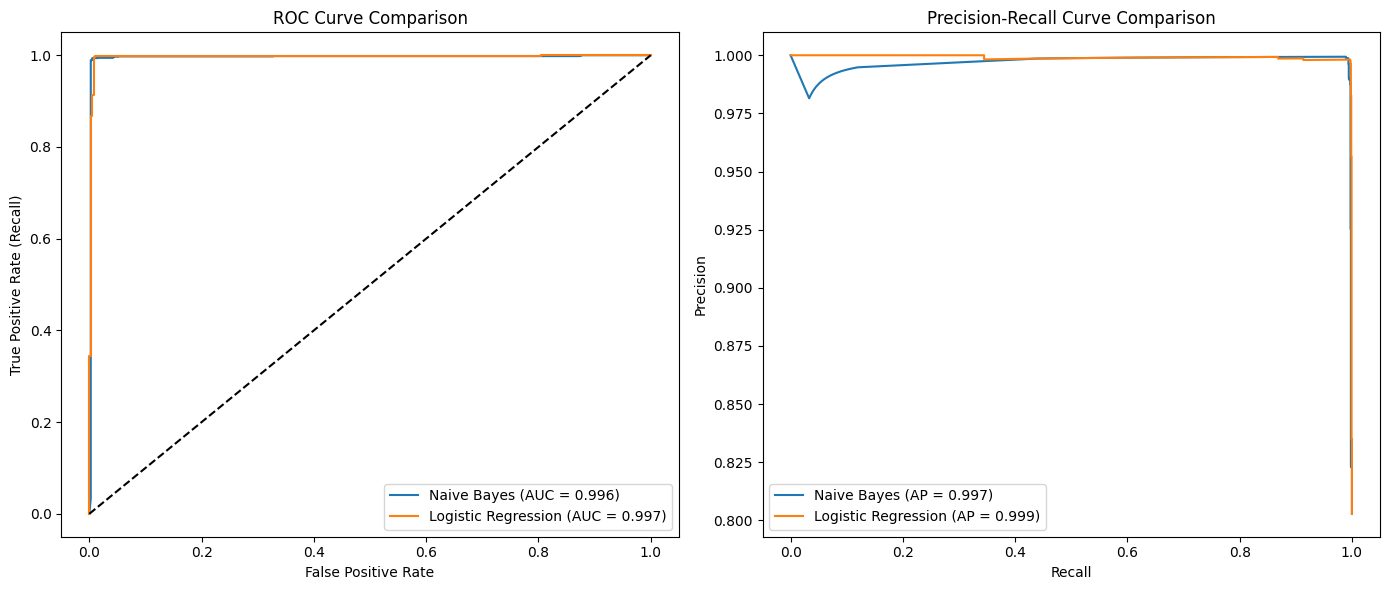

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

def plot_roc_and_pr(models, X_val, y_val):
    """
    Plot ROC and PR curves, overlaying all models on the same graph.
    """
    fig, axes = plt.subplots(1, 2, figsize=(14,6))

    # --- ROC Curve ---
    for name, model in models.items():
        y_proba = model.predict_proba(X_val)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, y_proba)
        auc = roc_auc_score(y_val, y_proba)
        axes[0].plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")
    axes[0].plot([0,1], [0,1], 'k--')
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate (Recall)")
    axes[0].set_title("ROC Curve Comparison")
    axes[0].legend(loc="lower right")

    # --- Precision-Recall Curve ---
    for name, model in models.items():
        y_proba = model.predict_proba(X_val)[:, 1]
        precision, recall, _ = precision_recall_curve(y_val, y_proba)
        ap = average_precision_score(y_val, y_proba)
        axes[1].plot(recall, precision, label=f"{name} (AP = {ap:.3f})")
    axes[1].set_xlabel("Recall")
    axes[1].set_ylabel("Precision")
    axes[1].set_title("Precision-Recall Curve Comparison")
    axes[1].legend(loc="lower left")

    plt.tight_layout()
    plt.show()

# Example usage:
models = {
    "Naive Bayes": NB,
    "Logistic Regression": LogiReg
}
plot_roc_and_pr(models, X_validation, Y_validation)


In [64]:
from scipy.io import loadmat
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score, roc_curve, roc_auc_score, average_precision_score, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns




In [65]:
MAT_PATH = "emails.mat" 
SEED = 69

def load_spam_mat(path=MAT_PATH):
    data = loadmat(path)
    X = data["X"]
    Y = data["Y"]
    
    X = X.T  
    Xcsr = X.tocsr()
    

    
    y = np.ravel(Y)       
    y = (y == 1).astype(int) 
    
    return Xcsr, y

In [ ]:
def create_holdout_split(X, y, test_size=0.2, random_state=SEED):
    
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=random_state, stratify=y
    )

    X_train, X_validation, y_train, y_validation = train_test_split(
        X_train, y_train, test_size=0.222, random_state=SEED+1, stratify=y_train
    )
    
    print(f"Train set: {len(y_train)} samples, {y_train.mean():.3f} spam rate")
    print(f"Validation set: {len(y_validation)} samples, {y_validation.mean():.3f} spam rate")
    print(f"Test set: {len(y_test)} samples, {y_test.mean():.3f} spam rate")
    
    return X_train, X_test, X_validation, y_train, y_test, y_validation

In [73]:
def find_optimal_threshold(model, X_validation, y_validation, limit_fp_rate=0.002):

    y_probability = model.predict_proba(X_validation)[:, 1]  
    thresholds = np.linspace(0.01, 0.99, 100)
    best_threshold = 0.01
    best_recall = 0
    
    for threshold in thresholds:
        y_pred = (y_probability >= threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_validation, y_pred).ravel()
        if (fp + tn) > 0:
            fp_rate = fp / (fp + tn)  
        else:
            fp_rate = 0
        
        if fp_rate <= limit_fp_rate:
            if (tp + fn) > 0:
                recall = tp / (tp + fn)
            else:
                recall = 0
            
                
            if recall > best_recall:
                best_recall = recall
                best_threshold = threshold
    roc_auc = roc_auc_score(y_validation, y_probability)
    pr_auc = average_precision_score(y_validation, y_probability)
    
    return best_threshold, roc_auc, pr_auc

In [74]:
def evaluate_model(model, X_test, y_test, threshold=0.5):
    
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)
    

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    # We calculate all common metrics.
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    fp_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
    
    return accuracy, precision, recall, fp_rate, confusion_matrix(y_test, y_pred)
    

In [ ]:
def plot_results(accuracy, precision, recall, fp_rate, confusion_matrix, model_name):
    """Plot confusion matrix and key metrics and save to file"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Confusion Matrix
    cm = confusion_matrix
    sns.heatmap(cm, annot=True, fmt='d', ax=ax1, cmap='Blues')
    ax1.set_title(f'{model_name} - Confusion Matrix')
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('Actual')
    ax1.set_xticklabels(['Non-Spam', 'Spam'])
    ax1.set_yticklabels(['Non-Spam', 'Spam'])
    
    # Metrics Bar Plot
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    values = [accuracy, precision, recall, fp_rate]
    
    bars = ax2.bar(metrics, values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
    ax2.set_title(f'{model_name} - Performance Metrics')
    ax2.set_ylabel('Score')
    ax2.set_ylim(0, 1)
    for bar, value in zip(bars, values):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{value:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    
    # Save plot
    filename = f"{model_name.replace(' ', '_').lower()}_results.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()  # Close to free memory
    print(f"Plot saved as: {filename}")

In [76]:
def plot_models(models, X_val, y_val):
    fig, axes = plt.subplots(1, 2, figsize=(14,6))

    for name, model in models.items():
        y_proba = model.predict_proba(X_val)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, y_proba)
        auc = roc_auc_score(y_val, y_proba)
        axes[0].plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
    axes[0].plot([0,1], [0,1], 'k--')
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate (Recall)")
    axes[0].set_title("ROC Curves per Model")
    axes[0].legend(loc="lower right")

    for name, model in models.items():
        y_proba = model.predict_proba(X_val)[:, 1]
        precision, recall, _ = precision_recall_curve(y_val, y_proba)
        ap = average_precision_score(y_val, y_proba)
        axes[1].plot(recall, precision, label=f"{name} (AP={ap:.3f})")
    axes[1].set_xlabel("Recall")
    axes[1].set_ylabel("Precision")
    axes[1].set_title("Precision-Recall Curves per Model")
    axes[1].legend(loc="lower left")

    plt.tight_layout()
    plt.show()
    return auc

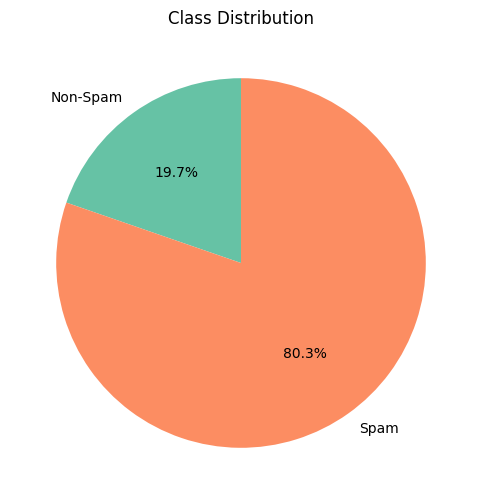

In [84]:
X, y = load_spam_mat()
classes, counts = np.unique(y, return_counts=True)
labels = []
for c in classes:
    if c == 0:
        labels.append("Non-Spam")
    else:
        labels.append("Spam")
colors = sns.color_palette("Set2", n_colors=len(labels))
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Class Distribution")
plt.savefig("Class_distribution.png", dpi=300, bbox_inches='tight')

Train set: 7002 samples, 0.803 spam rate
Validation set: 1998 samples, 0.803 spam rate
Test set: 1000 samples, 0.803 spam rate
Naive Bayes done
Logistic Regression done
SVM done
Random Forest done


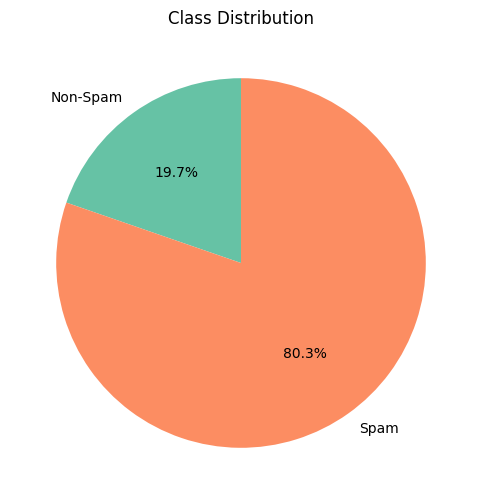

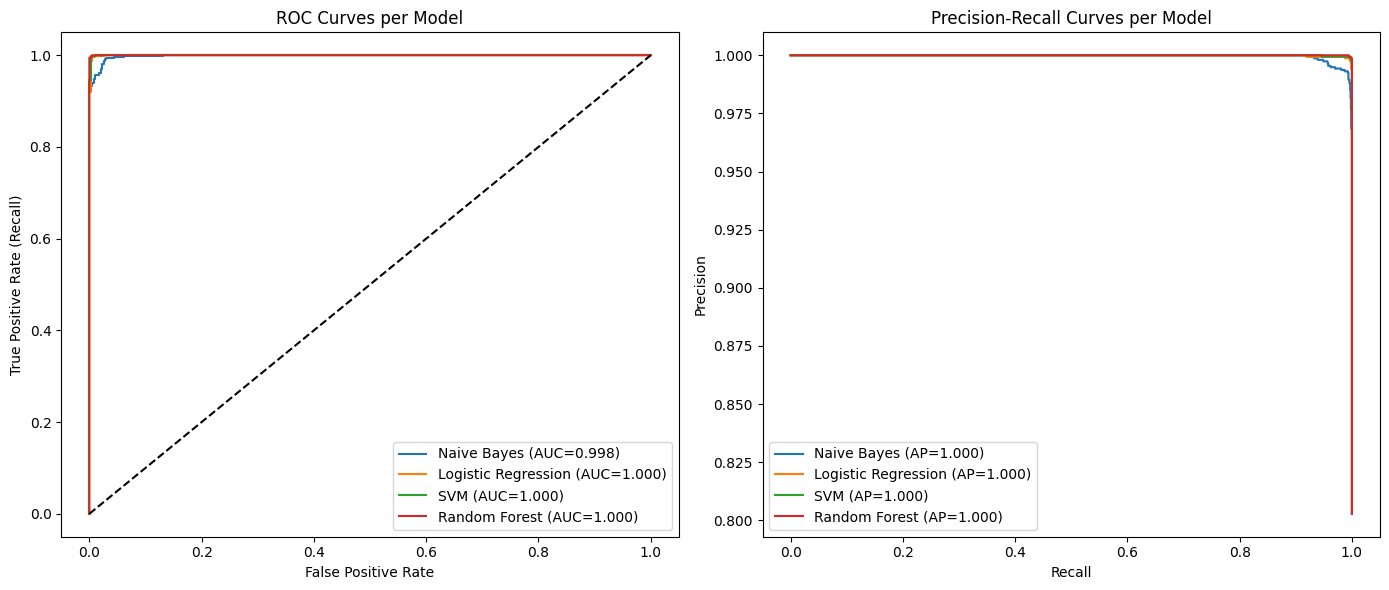

Train set: 7002 samples, 0.803 spam rate
Validation set: 1998 samples, 0.803 spam rate
Test set: 1000 samples, 0.803 spam rate
Naive Bayes done
Logistic Regression done
SVM done
Random Forest done


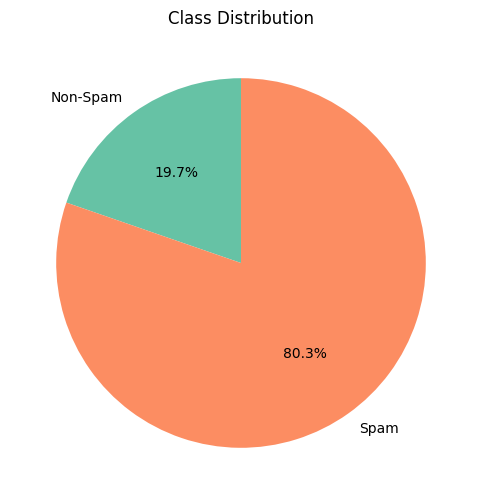

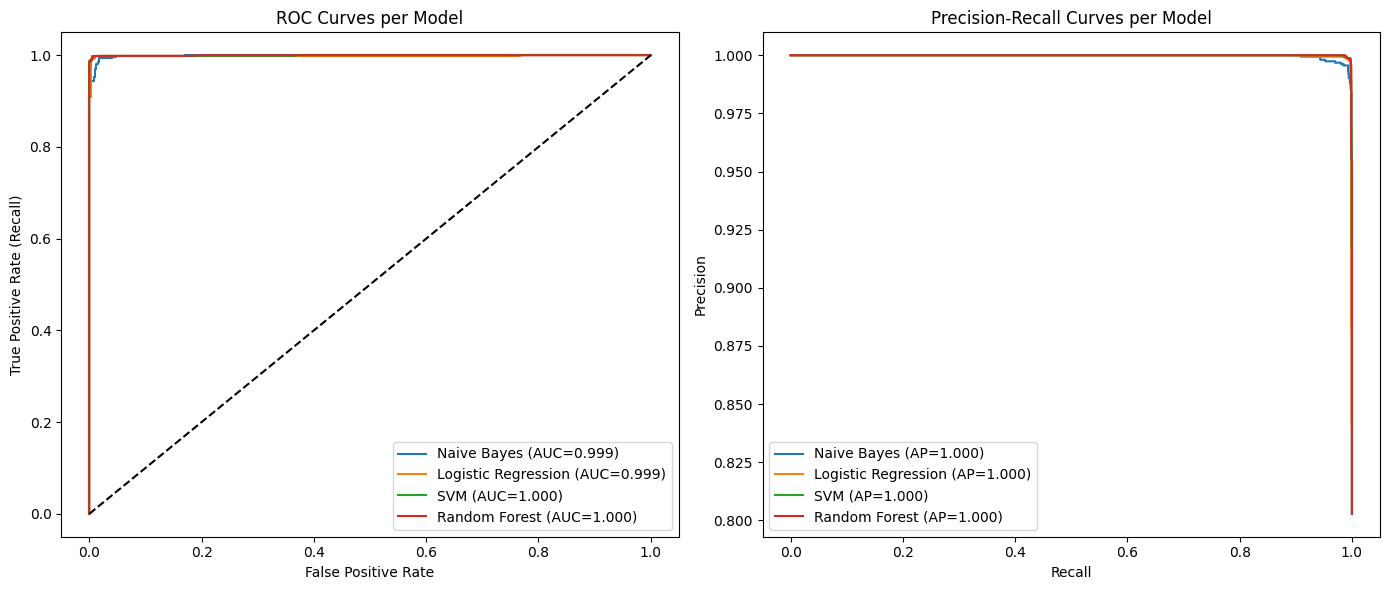

Train set: 7002 samples, 0.803 spam rate
Validation set: 1998 samples, 0.803 spam rate
Test set: 1000 samples, 0.803 spam rate
Naive Bayes done
Logistic Regression done
SVM done
Random Forest done


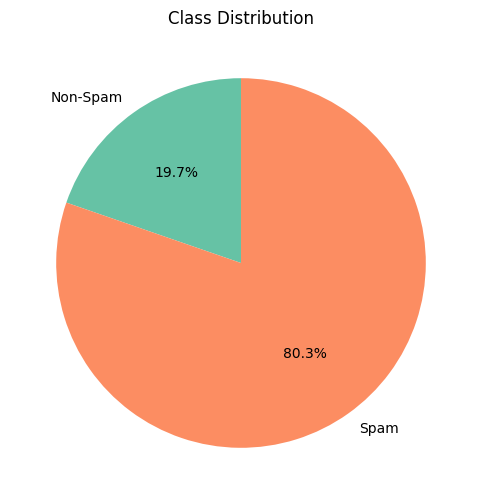

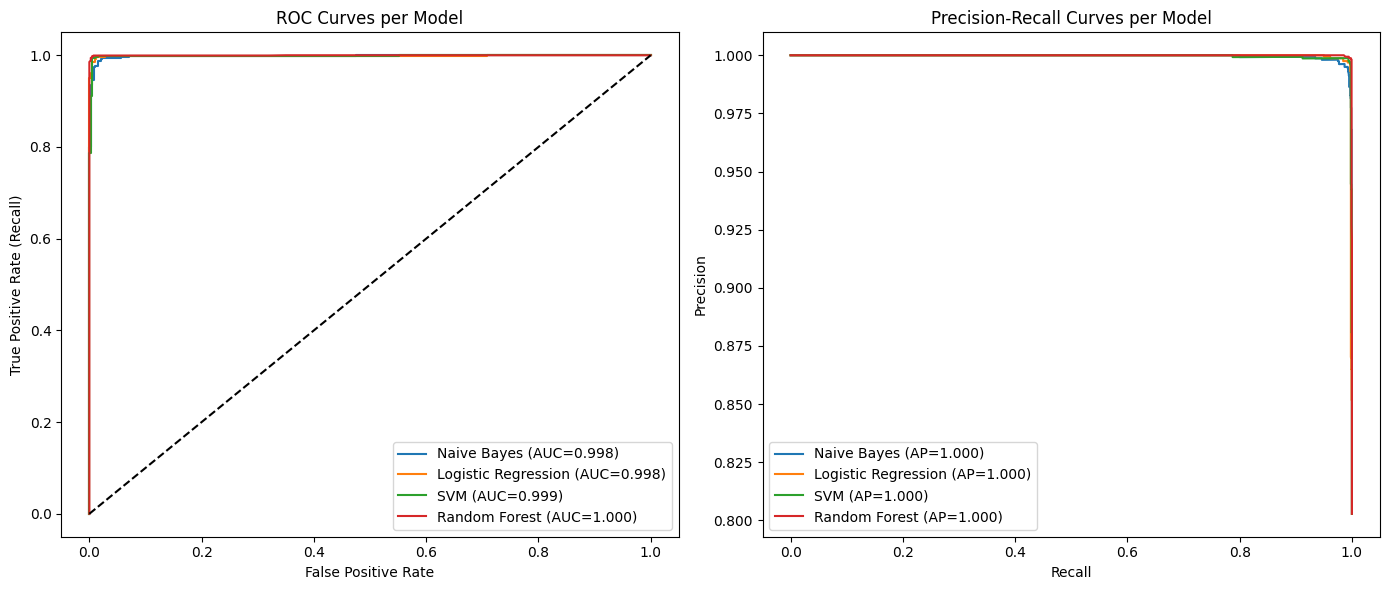

Train set: 7002 samples, 0.803 spam rate
Validation set: 1998 samples, 0.803 spam rate
Test set: 1000 samples, 0.803 spam rate
Naive Bayes done
Logistic Regression done
SVM done
Random Forest done


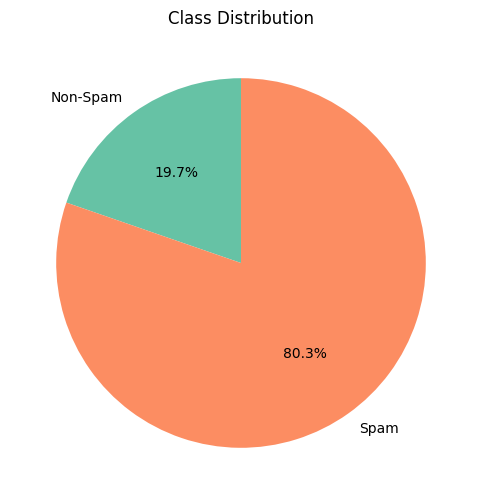

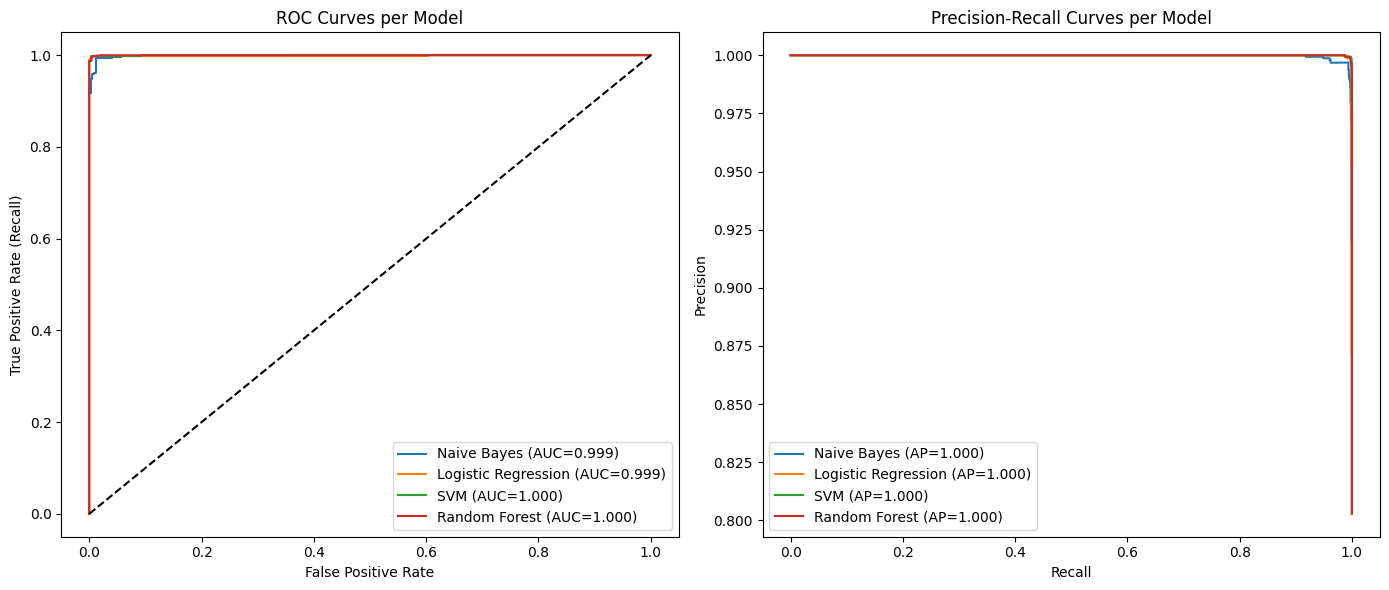

Train set: 7002 samples, 0.803 spam rate
Validation set: 1998 samples, 0.803 spam rate
Test set: 1000 samples, 0.803 spam rate
Naive Bayes done
Logistic Regression done
SVM done
Random Forest done


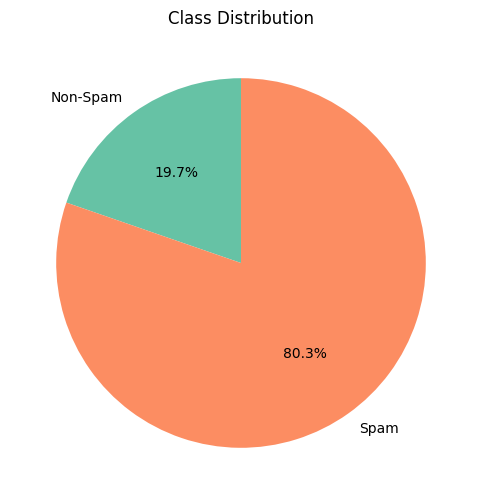

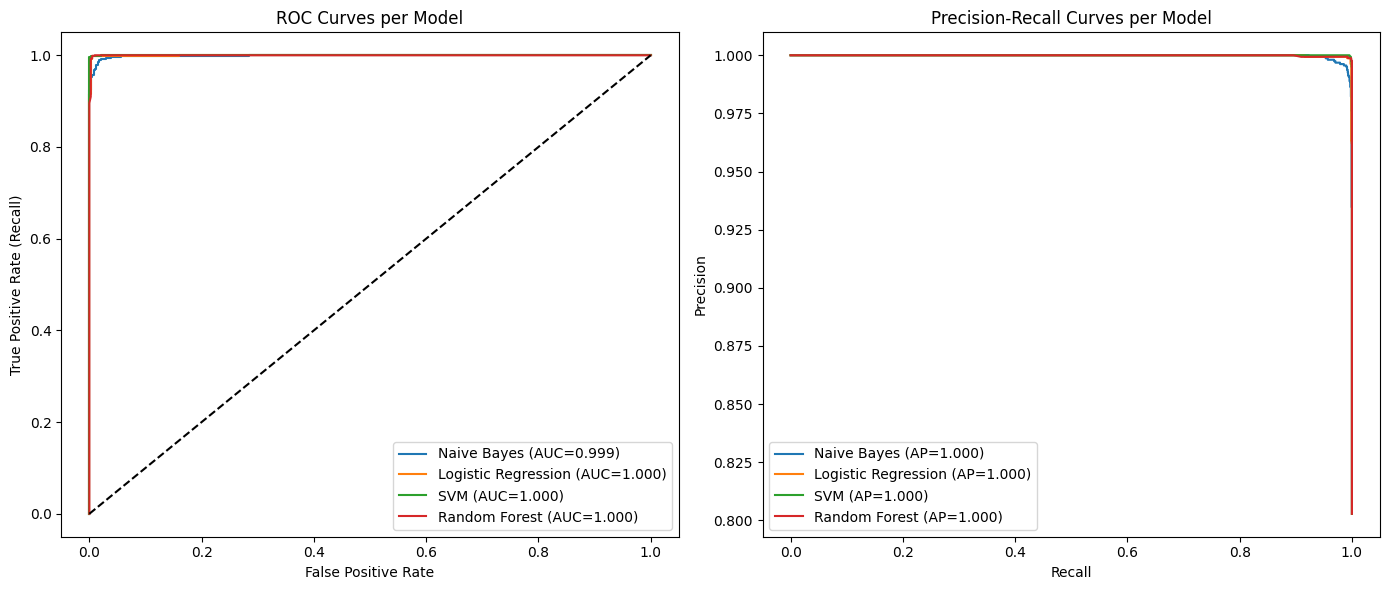

0.9998191387014697


In [83]:
X, y = load_spam_mat()
SEEDS = [12, 2001, 42, 8001, 21092000]
auc_scores = []
for i in SEEDS:
   
    X_train, X_test, X_validation, y_train, y_test, y_validation = create_holdout_split(X, y, test_size=0.2, random_state=i)

    X_train = tfidf.fit_transform(X_train)
    X_validation = tfidf.transform(X_validation)
    X_test = tfidf.transform(X_test)

    models = {
        'Naive Bayes': MultinomialNB(alpha=1.0),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=i),
        'SVM': SVC(probability=True, random_state=i, C=1.0),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=i, n_jobs=-1)
    }

    for name, model in models.items(): 
            
        model.fit(X_train, y_train)
        # threshold = find_optimal_threshold(model, X_validation, y_validation)
        print(name + " done")
    
    auc_score = plot_models(models, X_validation, y_validation)
    auc_scores.append(auc_score)
print(np.mean(auc_scores))




In [61]:
SEEDS = [12, 2001, 42, 8001, 21092000]

all_auc_scores = {"Naive Bayes": [], "Logistic Regression": [], "SVM": [], "Random Forest": []}

for seed in SEEDS:
    
    X_train, X_test, X_val, y_train, y_test, y_val = create_holdout_split(
        X, y, test_size=0.2, random_state=seed
    )
    X_train = tfidf.fit_transform(X_train)
    X_val = tfidf.transform(X_val)
    X_test = tfidf.transform(X_test)

    models = {
        "Naive Bayes": MultinomialNB(alpha=1.0),
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=seed),
        "SVM": SVC(probability=True, random_state=seed, C=1.0),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=seed, n_jobs=-1),
    }
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_proba = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_proba)
        all_auc_scores[name].append(auc)

for name, scores in all_auc_scores.items():
    mean_auc = np.mean(scores)
    std_auc = np.std(scores)
    print(f"{name}: {mean_auc:.4f} ± {std_auc:.4f}")

Naive Bayes (seed=12) AUC = 0.9986
Logistic Regression (seed=12) AUC = 0.9994
SVM (seed=12) AUC = 0.9999
Random Forest (seed=12) AUC = 0.9999
Naive Bayes (seed=2001) AUC = 0.9989
Logistic Regression (seed=2001) AUC = 0.9988
SVM (seed=2001) AUC = 0.9995
Random Forest (seed=2001) AUC = 1.0000
Naive Bayes (seed=42) AUC = 0.9984
Logistic Regression (seed=42) AUC = 0.9985
SVM (seed=42) AUC = 0.9990
Random Forest (seed=42) AUC = 0.9997
Naive Bayes (seed=8001) AUC = 0.9985
Logistic Regression (seed=8001) AUC = 0.9994
SVM (seed=8001) AUC = 0.9990
Random Forest (seed=8001) AUC = 0.9996
Naive Bayes (seed=21092000) AUC = 0.9992
Logistic Regression (seed=21092000) AUC = 0.9999
SVM (seed=21092000) AUC = 1.0000
Random Forest (seed=21092000) AUC = 0.9984

=== Average AUC across seeds ===
Naive Bayes: 0.9987 ± 0.0003
Logistic Regression: 0.9992 ± 0.0005
SVM: 0.9995 ± 0.0004
Random Forest: 0.9995 ± 0.0006
